Projektarbeit Data Science

Erkundung und Vorhersage der Hauspreise für Boston

Willi Brügel

In [57]:
# ----------------------------------------
# 1a) Datensatz importieren, fehlende 
# und doppelte Werte prüfen und behandeln
# ----------------------------------------

import pandas as pd
import numpy as np

# URL Datensatz
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# erste Zeilen ausblenden, nur Überschriften
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Features zusammenbauen (13 Spalten)
# Daten aus geraden und ungeraden Zeilen zusammenführen
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# Zielvariable extrahieren
target = raw_df.values[1::2, 2]
target = pd.DataFrame(target, columns=["MEDV"])

# Benennung der Spalten
columns = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE",
    "DIS","RAD","TAX","PTRATIO","B","LSTAT"
]

# Dataframe erzeugen
df = pd.DataFrame(data, columns=columns)
# target hinzu
df["MEDV"] = target

#print(df)

# doppelte Werte löschen 
# (im Datensatz sind keine doppelten Werte vorhanden, 
# wie mit den folgenden Zeilen geprüft wurde)
# len_vor_dropna = len(df)
new_df = df.dropna()
# len_nach_dropna = len(df)
# print(len_vor_dropna - len_nach_dropna)

# mit folgendem Code wurde geprüft, ob es leere Zellen gibt
# leere_zellen = df.isna().sum().sum()
# print(leere_zellen)
# --> Ergebnis: keine leeren Zellen

variablen_bedeutung = {
    "CRIM": "Kriminalitätsrate pro Kopf in der Stadt",
    "ZN": "Anteil des Wohngebietes mit Grundstücken über 25.000 ft² (~2322 m²)",
    "INDUS": "Anteil der Gewerbefläche (ohne Einzelhandel) in der Stadt",
    "CHAS": "Dummy-Variable: 1 = grenzt an den Charles River, sonst 0",
    "NOX": "Konzentration von Stickoxiden (in Teilen pro 10 Millionen)",
    "RM": "Durchschnittliche Anzahl der Zimmer pro Wohneinheit",
    "AGE": "Anteil der vor 1940 erbauten, selbst genutzten Häuser",
    "DIS": "Gewichtete Entfernung zu fünf Arbeitszentren in Boston",
    "RAD": "Index der Erreichbarkeit über Autobahnen",
    "TAX": "Grundsteuer pro 10.000 USD Immobilienwert",
    "PTRATIO": "Verhältnis von Schülern zu Lehrkräften in der Stadt",
    "B": "1000 * (Bk 0.63)², wobei Bk = Anteil der schwarzen Bevölkerung",
    "LSTAT": "Prozentualer Anteil der Bevölkerung mit niedrigem sozialen Status",
    "MEDV": "Medianwert der selbstgenutzten Häuser (in 1.000 USD) Zielvariable"
}



- Der Datensatz wird eingelesen und in ein passendes Format (mit Überschriften) gebracht
- Der Datensatz wird auf doppelte Werte und leere Zellen geprüft --> beides nicht vorhanden. Die entsprechenden Zeilen mit den print-Ausgaben sind auskommentiert

In [58]:
# ----------------------------------------
# 1b) Analyse der Eigenschaften: 
# Mittelwert, Modus, Median, Varianz, Abweichung - ergänzt durch min. und max.
# ----------------------------------------

statistic_table = pd.DataFrame({
    "Mittelwert": df.mean(),        # Mittelwert über alle Daten
    "Modus": df.mode().iloc[0],     # Wert der am häufigsten Vorkommt
    "Median": df.median(),          # an diesem Punkt Datensatz in zwei Teile splitten
    "Varianz": df.var(),            # durchschnittliche quadratische Abweichung zum Mittelwert
    "Standardabweichung": df.std(), # durchschnittlicher Abstand zum Mittelwert
    "Minimum": df.min(),            # minimaler Wert im Datensatz
    "Maximum": df.max(),            # maximaler Wert im Datensatz
})

print(statistic_table)


         Mittelwert      Modus     Median       Varianz  Standardabweichung  \
CRIM       3.613524    0.01501    0.25651     73.986578            8.601545   
ZN        11.363636    0.00000    0.00000    543.936814           23.322453   
INDUS     11.136779   18.10000    9.69000     47.064442            6.860353   
CHAS       0.069170    0.00000    0.00000      0.064513            0.253994   
NOX        0.554695    0.53800    0.53800      0.013428            0.115878   
RM         6.284634    5.71300    6.20850      0.493671            0.702617   
AGE       68.574901  100.00000   77.50000    792.358399           28.148861   
DIS        3.795043    3.49520    3.20745      4.434015            2.105710   
RAD        9.549407   24.00000    5.00000     75.816366            8.707259   
TAX      408.237154  666.00000  330.00000  28404.759488          168.537116   
PTRATIO   18.455534   20.20000   19.05000      4.686989            2.164946   
B        356.674032  396.90000  391.44000   8334.752

- die Statistikwerte des Datensatzes wurden ermittelt und über print ausgegeben

In [59]:
# ----------------------------------------
# 1c) Korrelationswert: 
# - Anwendung und Interpretation
# - bei nicht annähernder Normalverteilung, Rangkorrelationskoeffizient
# ----------------------------------------

from scipy.stats import shapiro

# Spalten auf Normalverteilund prüfen mit Shapiro-Wilk-Test
# stat: Abweichung der Daten von Normalverteilung
# bei p >= 0.05: keine Normalverteilung

shapiro_results = {}

for col in df.select_dtypes(include=['float', 'int']).columns:
    stat, p = shapiro(df[col])
    shapiro_results[col] = p

shapiro_df = pd.DataFrame(shapiro_results, index=["p-Wert"]).T
print(shapiro_df)



               p-Wert
CRIM     1.328589e-36
ZN       7.882830e-34
INDUS    1.064699e-17
CHAS     2.350507e-40
NOX      5.776225e-14
RM       2.411977e-10
AGE      2.230766e-18
DIS      2.185390e-17
RAD      8.073213e-30
TAX      1.162781e-23
PTRATIO  2.360649e-17
B        6.057660e-36
LSTAT    8.286632e-14
MEDV     4.941386e-16


- Die Normalverteilung der Daten wird mit dem Shapiro Wilk Test geprüft. 
  --> bei Werten > 0,05 liegt eine Normalverteilung vor
  --> für keinen der Werte liegt eine Normalverteilung vor, daher werden alle Werte mit dem Rangkorrelationskoeffizienten bewertet

In [60]:
# ----------------------------------------
# .... Fortsetzung 1c) Korrelationswert: 
# - Anwendung und Interpretation
# - bei nicht annähernder Normalverteilung, Rangkorrelationskoeffizient
# ----------------------------------------

# Sperman Rangkorrelationskoeffizient wird für die Daten berechnet

from scipy.stats import spearmanr

spearman_results = {}

# Schleife über alle numerischen Spalten außer MEDV: 
for col in df.select_dtypes(include=["float", "int"]).columns:
    if col != "MEDV":
        # Spearman zwischen Kriterium und Prädiktor: 
        corr, p = spearmanr(df[col], df["MEDV"])
        # Daten speichern: 
        spearman_results[col] = {"Spearman-Korrelation: ": corr, "p-Wert: ": p}

print("Prädiktoren, die eine Korrelation mit Betrag > 0,5 zum Kriterium haben: ")

# Ausgabe der Variablen mit starkem Einfluss inkl. Beschreibung
for col, werte in spearman_results.items():
    corr_wert = werte["Spearman-Korrelation: "]  # tatsächlicher Korrelationswert
    if abs(corr_wert) > 0.5:
        bedeutung = variablen_bedeutung.get(col, "Keine Beschreibung verfügbar")
        print(f"{col:7} {corr_wert:10.6f}   {bedeutung}")


Prädiktoren, die eine Korrelation mit Betrag > 0,5 zum Kriterium haben: 
CRIM     -0.558891   Kriminalitätsrate pro Kopf in der Stadt
INDUS    -0.578255   Anteil der Gewerbefläche (ohne Einzelhandel) in der Stadt
NOX      -0.562609   Konzentration von Stickoxiden (in Teilen pro 10 Millionen)
RM        0.633576   Durchschnittliche Anzahl der Zimmer pro Wohneinheit
AGE      -0.547562   Anteil der vor 1940 erbauten, selbst genutzten Häuser
TAX      -0.562411   Grundsteuer pro 10.000 USD Immobilienwert
PTRATIO  -0.555905   Verhältnis von Schülern zu Lehrkräften in der Stadt
LSTAT    -0.852914   Prozentualer Anteil der Bevölkerung mit niedrigem sozialen Status


Der Rangkorrelationskoeffizient mit der Spearman Methode misst den Zusammenhang zwischen zwei Variablen anhand ihrer Rangordnung

Die Daten mit einer Abhängigkeit deren Betrag > 0,5 ist wurden mit print im oberen Code-Block ausgegeben.
Stärkster Zusammenhang besteht zu LSTAT mit -0,85

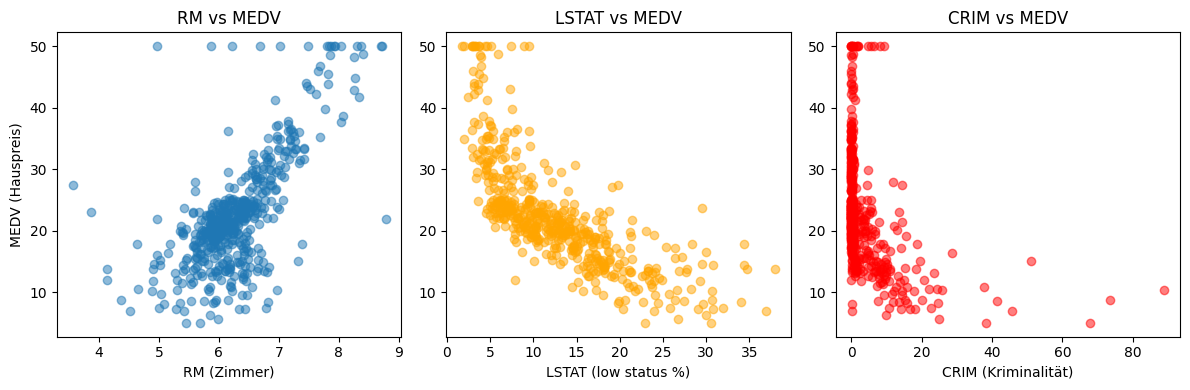

In [61]:
# ----------------------------------------
# 1d) Streudiagramm: 
# - Beziehung zwischen RM, LSTAT und CRIM 
# ----------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# RM vs MEDV
plt.subplot(1, 3, 1)
plt.scatter(df["RM"], df["MEDV"], alpha=0.5)
plt.xlabel("RM (Zimmer)")
plt.ylabel("MEDV (Hauspreis)")
plt.title("RM vs MEDV")

# LSTAT vs MEDV
plt.subplot(1, 3, 2)
plt.scatter(df["LSTAT"], df["MEDV"], alpha=0.5, color="orange")
plt.xlabel("LSTAT (low status %)")
plt.title("LSTAT vs MEDV")

# CRIM vs MEDV
plt.subplot(1, 3, 3)
plt.scatter(df["CRIM"], df["MEDV"], alpha=0.5, color="red")
plt.xlabel("CRIM (Kriminalität)")
plt.title("CRIM vs MEDV")

plt.tight_layout()
plt.show()


- die Beziehung zwischen den drei Prädiktoren RM, LSTAT und CRIM wurde jeweils in einem Streudiagramm dargestellt und ist visuall erkennbar

In [62]:
# ----------------------------------------
# 1d) Skalierung der Daten als Vorbereitung für Modellierung
# ----------------------------------------

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Daten mit StandardScaler skalieren: 
df_scaled = scaler.fit_transform(df)
# in DataFrame zurückwandeln: 
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# print(df_scaled.head())


- Die Daten werden mit dem StandardScaler skaliert. 
- Mittelwerte bekommen den Wert 0
- Abweichungen davon: +/- 1 enspricht der Standardabweichung
- mit der auskommentierten print-Funktion können bei Bedarf die ersten Werte der skalierten Tabelle ausgegeben werden. 

höchster Silhouettenkoeffizient bei k = 2 mit Wert = 0.2934637638430272


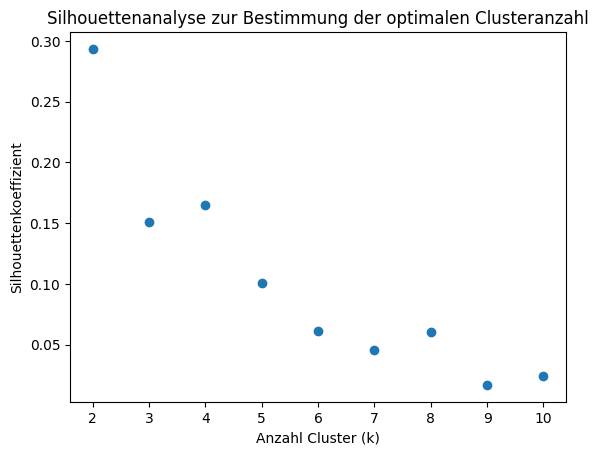

In [63]:
# ----------------------------------------
# 2a) Stadtteile mit K-Means clustern mit Spalten CRIM, LSTAT, DIS
# 2b) Silhouetten Koeffizient für Cluster-Anzahl
# 2c) Darstellung Silhouetten Koeffizient
# ----------------------------------------

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}

for k in range(2, 11): 
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_scaled[["CRIM", "LSTAT", "DIS"]])
    sil = silhouette_score(df_scaled, labels)
    sil_scores[k] = sil
best_k = max(sil_scores, key=sil_scores.get)
best_sil = sil_scores[best_k]

print(f"höchster Silhouettenkoeffizient bei k = {best_k} mit Wert = {best_sil}")

plt.scatter(sil_scores.keys(), sil_scores.values())
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("Silhouettenkoeffizient")
plt.title("Silhouettenanalyse zur Bestimmung der optimalen Clusteranzahl")
plt.show()



- KMEANS für die drei vorgegebenen Prädiktoren angelegt
- Silhouetten-Koeffizient um Anzahl der Cluster festzulegen --> Ergebnis: Maximum bei k=2 
- Ergebnisse in Matplotlib dargestellt

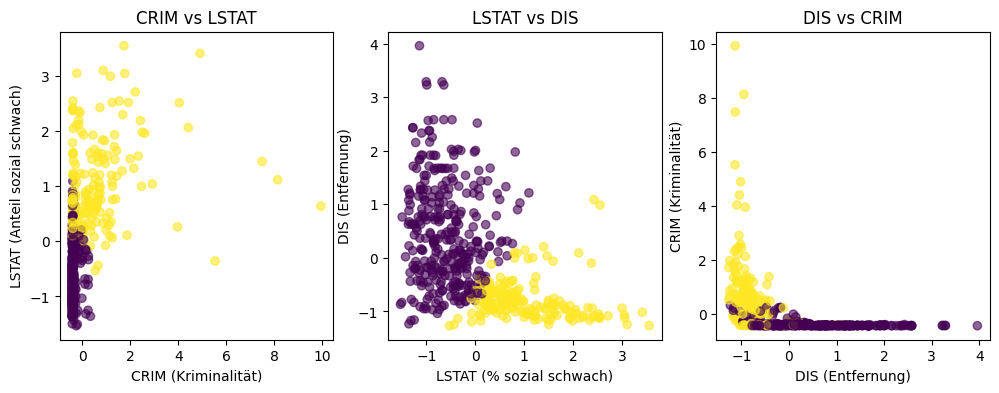

In [64]:
# ----------------------------------------
# 2d) Klassifizierung der Daten und Darstellung in Streudiagrammen
# CRIM & LSTAT, LSTAT & DIS, DIS & CRIM
# ----------------------------------------

# KMEANS mit best_k anwenden: 
kmeans =  KMeans(n_clusters=best_k, random_state=42)
cluster_km = kmeans.fit_predict(df_scaled[["CRIM", "LSTAT", "DIS"]])

# Spalte mit KMeans-Ergebnis in den df_scaled einfügen
df_scaled["Cluster_KMeans"] = cluster_km

# Plots erstellen: 
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df_scaled["CRIM"], df_scaled["LSTAT"], c=df_scaled["Cluster_KMeans"], cmap="viridis", alpha=0.6)
plt.xlabel("CRIM (Kriminalität)")
plt.ylabel("LSTAT (Anteil sozial schwach)")
plt.title("CRIM vs LSTAT")

# Plot 2: LSTAT & DIS
plt.subplot(1, 3, 2)
plt.scatter(df_scaled["LSTAT"], df_scaled["DIS"], c=df_scaled["Cluster_KMeans"], cmap="viridis", alpha=0.6)
plt.xlabel("LSTAT (% sozial schwach)")
plt.ylabel("DIS (Entfernung)")
plt.title("LSTAT vs DIS")

# Plot 3: DIS & CRIM
plt.subplot(1, 3, 3)
plt.scatter(df_scaled["DIS"], df_scaled["CRIM"], c=df_scaled["Cluster_KMeans"], cmap="viridis", alpha=0.6)
plt.xlabel("DIS (Entfernung)")
plt.ylabel("CRIM (Kriminalität)")
plt.title("DIS vs CRIM")

plt.show()

- die Plots wurden erstellt und die Einteilung der Daten in zwei Gruppen ist jeweils deutlich zu sehen

In [65]:
# ----------------------------------------
# 3a) Aufteilung in Test- / Trainingsdaten
# ----------------------------------------

from sklearn.model_selection import train_test_split

# X und y aus Datensatz extrahieren: 
X = df_scaled.drop(columns=["MEDV"])   # Prädiktoren
y = df_scaled["MEDV"]                  # Zielvariable

# Aufteilung in Test- und Trainingsdaten für jeweils X und  y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

- die Daten wurden mit train_test_split von sklearn.model_selection aufgeteilt
- 20% der Daten werden für das Testen genutzt, der Rest für das Training

In [66]:
# ----------------------------------------
# Vorbereitung f+r 3c) Testergebnisse der einzelnen  
# Algorithmen sammeln
# ----------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

modellvergleich = pd.DataFrame(columns=["Modellname", "MSE Train", "MSE Test", "R² Train", "R² Test"])

def bewerte_modell(modellname, modell, X_train, y_train, X_test, y_test):
    """
    Berechnet MSE & R² für Training und Test und speichert die Ergebnisse
    in der globalen Vergleichstabelle 'modellvergleich'.
    """
    global modellvergleich  # erlaubt Schreibzugriff auf die globale Variable

    # Vorhersagen
    y_train_pred = modell.predict(X_train)
    y_test_pred = modell.predict(X_test)

    # MSE & R² berechnen
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # In DataFrame speichern
    neues_ergebnis = pd.DataFrame({
        "Modellname": [modellname],
        "MSE Train": [mse_train],
        "MSE Test": [mse_test],
        "R² Train": [r2_train],
        "R² Test": [r2_test]
    })

    modellvergleich = pd.concat([modellvergleich, neues_ergebnis], ignore_index=True)
    print("aktueller Stand Modellvergleich: ")
    print(modellvergleich)

- Funktion erstellt, damit bei jedem Algorithmus direkt die Bewertung angestoßen werden kann. 

In [67]:
# ----------------------------------------
# 3b-i) Multiple lineare Regression 
# mit den Prädiktoren LSTAT, RM und DIS
# ----------------------------------------

# 1. - Lineare Regression: 

from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

# Daten für lineare Regression aus Trainingsdatensatz wählen:
X_linreg = X_train[["LSTAT", "RM", "DIS"]]
y_linreg = y_train

# Modell anlegen:
regr = linear_model.LinearRegression()
regr.fit(X_linreg, y_linreg)

# Ergebnisse in modellvergleich speichern: 
bewerte_modell("mult. lin. Regression", regr, X_linreg, y_linreg, X_test[["LSTAT", "RM", "DIS"]], y_test)

print("Modell wurde trainiert mit den Variablen: LSTAT, RM, DIS")


aktueller Stand Modellvergleich: 
              Modellname  MSE Train  MSE Test  R² Train  R² Test
0  mult. lin. Regression   0.318317  0.498161  0.682815   0.4917
Modell wurde trainiert mit den Variablen: LSTAT, RM, DIS


C:\Users\Willi\AppData\Local\Temp\ipykernel_5724\1966471865.py:36: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



- multiple lineare Regression durchgeführt mit den 3 vorgegebenen unabhängigen Variablen
- die Bewertung wird in dem DataFrame modellbewertung gespeichert
- so können am Ende des Programms die Ergebnisse schnell und übersichtlich ausgegeben werden

c:\Users\Willi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names




 Erstelle 3D-Plot: LSTAT & RM | DIS = -0.00


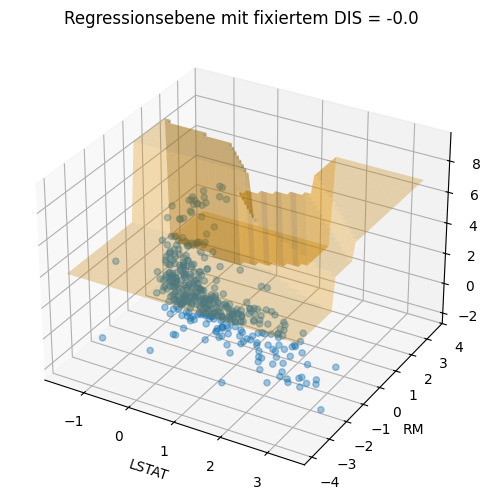


 Erstelle 3D-Plot: LSTAT & DIS | RM = -0.00


c:\Users\Willi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



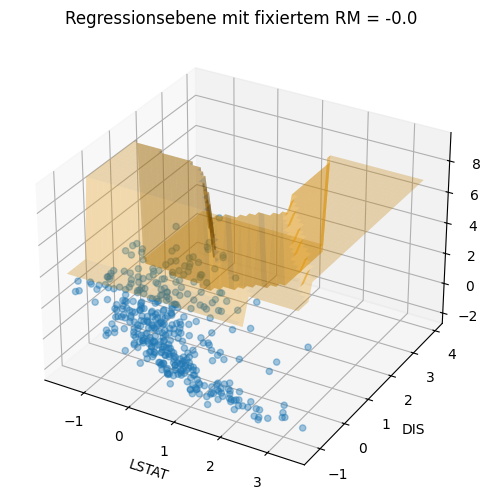


 Erstelle 3D-Plot: RM & DIS | LSTAT = 0.02


c:\Users\Willi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



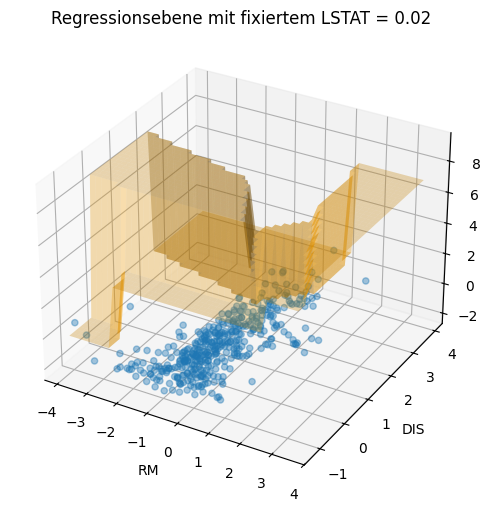

In [68]:
# ----------------------------------------
# 3b-i) 3D-Darstellung inkl. Hyperebene 
# ----------------------------------------

import plotly.graph_objects as go

def plot_regression_3d(feature1, feature2, fixed_feature, fixed_value):
    """
    erstellt 3D-Plot mit Hyperebene für 2 Variablen
    - Feature 1 - X-Achse 
    - Feature 2 - Y-Achse
    - Zielvariable ist MEDV
    - das 3. Feature wird auf fixed gesetzt
    """
    print(f"\n Erstelle 3D-Plot: {feature1} & {feature2} | {fixed_feature} = {fixed_value:.2f}")

    # Wertebereiche für die beiden Achsen
    x_range = np.linspace(X_linreg[feature1].min(), X_linreg[feature1].max(), 40)
    y_range = np.linspace(X_linreg[feature2].min(), X_linreg[feature2].max(), 40)
    X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

    # Regressionsfläche berechnen: Dritte Variable wird konstant gehalten
    XY_pred = model.predict(np.c_[
        X_mesh.ravel(),
        Y_mesh.ravel(),
        np.full_like(X_mesh.ravel(), fixed_value)  # Konstanter Wert
    ]).reshape(X_mesh.shape)

    # 3D-Plot erstellen
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Punkte im Plot darstellen
    ax.scatter(X_linreg[feature1], X_linreg[feature2], y_linreg,
               alpha=0.4, label='Reale Datenpunkte')

    # Regressionsfläche zeichnen
    ax.plot_surface(X_mesh, Y_mesh, XY_pred, alpha=0.3, color='orange', label="Regressionsebene")

    # Achsenbeschriftung
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel("MEDV (Hauspreis)")
    ax.set_title(f"Regressionsebene mit fixiertem {fixed_feature} = {round(fixed_value, 2)}")

    plt.show()

# Plots mit 2 Variablen und einer "fixierten Vairablen" erstellen
mean_dis = X_linreg["DIS"].mean()
mean_rm = X_linreg["RM"].mean()
mean_lstat = X_linreg["LSTAT"].mean()


# Plot 1: LSTAT & RM, DIS fixiert
plot_regression_3d("LSTAT", "RM", "DIS", mean_dis)

# Plot 2: LSTAT & DIS, RM fixiert
plot_regression_3d("LSTAT", "DIS", "RM", mean_rm)

# Plot 3: RM & DIS, LSTAT fixiert
plot_regression_3d("RM", "DIS", "LSTAT", mean_lstat)

- Hyperebenen wurden dargestellt. Die Aufgabenstellung verlangt 3 Prädiktoren, im 3D-Plot können jedoch nur zwei dargestellt werden. 
- Daher werden 3 Plots erstellt und jeweils ein Prädiktor konstant gehalten

In [73]:
# ----------------------------------------
# 3b-ii) K-Nearest Neighbours
# Vorgaben aus Aufgabenstellung: 
# euklidische Distanz, fünf Nachbarn, Ball-Tree Algorithmus
# ----------------------------------------

from sklearn.neighbors import KNeighborsRegressor

# knn Objekt 
knn = KNeighborsRegressor(
    n_neighbors=5,          # 5 Nachbarn
    algorithm="ball_tree",  # Ball-Tree verwenden
    p=2                     # p=2 → Euklidische Distanz
)

knn.fit(X_train, y_train)

# Ergebnisse in modellvergleich speichern: 
bewerte_modell("KNN (k = 5)", knn, X_train, y_train, X_test, y_test)


aktueller Stand Modellvergleich: 
              Modellname  MSE Train  MSE Test  R² Train   R² Test
0  mult. lin. Regression   0.318317  0.498161  0.682815  0.491700
1                    KNN   0.153013  0.304920  0.847531  0.688874
2            KNN (k = 5)   0.153013  0.304920  0.847531  0.688874
3            KNN (k = 5)   0.103981  0.361709  0.896389  0.630929
4            KNN (k = 5)   0.153013  0.304920  0.847531  0.688874


- KNN Algorithmus mit den vorgegebenen Werten wurde erstellt
- Bewertung dieses Modells mit bewerte_modell() erstellt

aktueller Stand Modellvergleich: 
              Modellname  MSE Train  MSE Test  R² Train   R² Test
0  mult. lin. Regression   0.318317  0.498161  0.682815  0.491700
1                    KNN   0.153013  0.304920  0.847531  0.688874
2            KNN (k = 5)   0.153013  0.304920  0.847531  0.688874
3            KNN (k = 5)   0.103981  0.361709  0.896389  0.630929
4            KNN (k = 5)   0.153013  0.304920  0.847531  0.688874
5          Decision Tree   0.000000  0.572493  1.000000  0.415856
6          Decision Tree   0.000000  0.543649  1.000000  0.445287
7          Decision Tree   0.000000  0.570218  1.000000  0.418177
8          Decision Tree   0.180931  0.564142  0.819713  0.424376


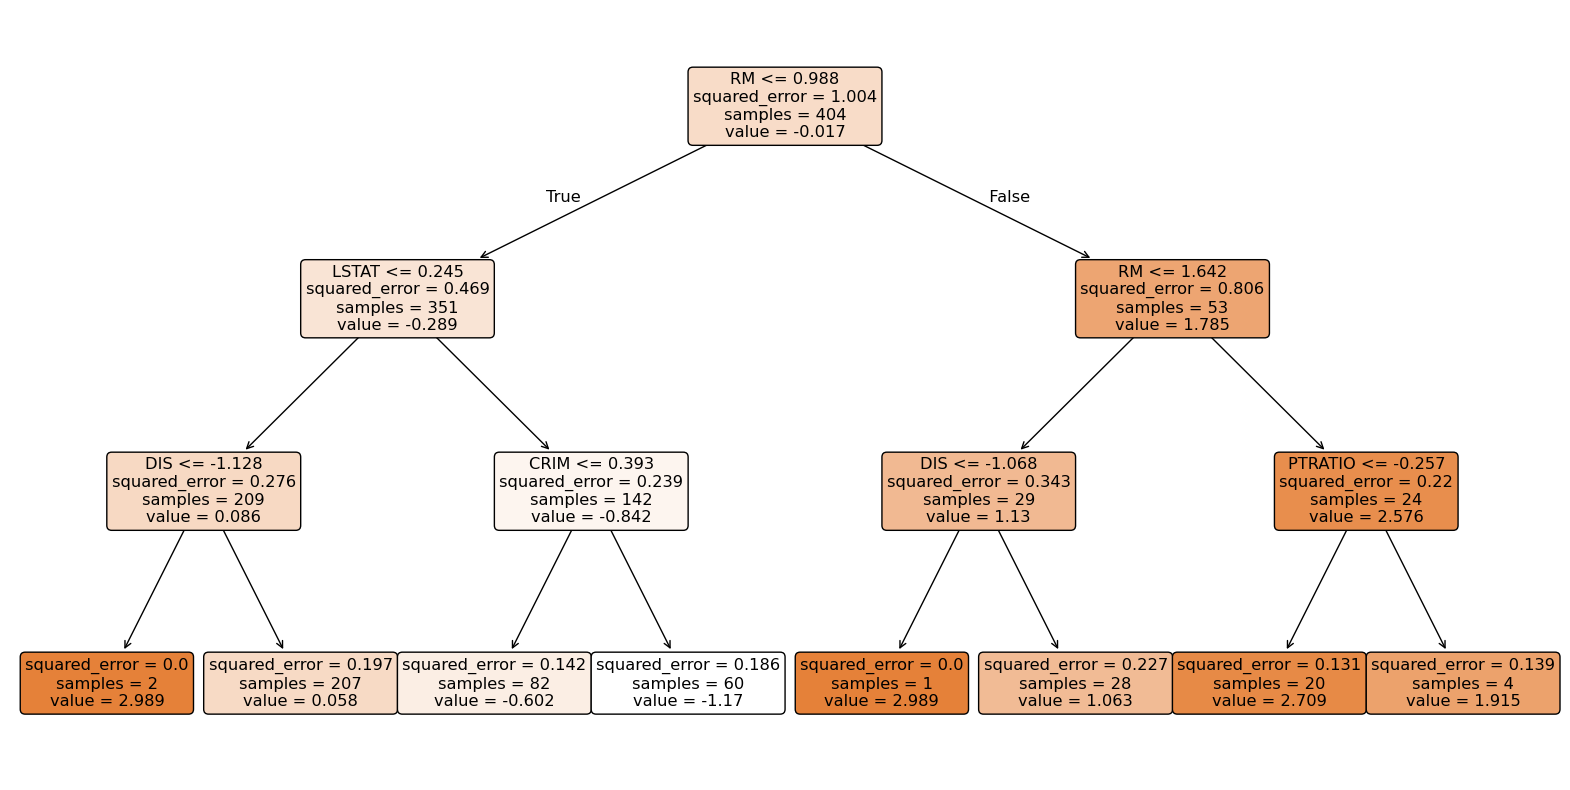

In [ ]:
# ----------------------------------------
# 3b-iii) Entscheidungsbaum mit Visualisierung
# Vorgaben aus Aufgabenstellung: max. 3 Ebenen
# ----------------------------------------

from sklearn.tree import DecisionTreeRegressor, plot_tree


dtree = DecisionTreeRegressor(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Ergebnisse in modellvergleich speichern: 
bewerte_modell("Decision Tree n=3", dtree, X_train, y_train, X_test, y_test)

# Decision Tree visuell darstellen: 
plt.figure(figsize=(20, 10))
plot_tree(dtree,
          feature_names=X_train.columns,
          filled=True,
          rounded=True,
          max_depth=3)      # nur die ersten 3 Ebenen zeigen
plt.show()

- Entscheidungsbaum mit 3 Ebenen wurde implementiert
- Bewertung dieses Modells mit bewerte_modell() erstellt
- visuelle Darstellung